# Introduction

In this project we were given a dataset consisting of statements and their emotions, our goal is to use different classifiers and prepreocessing methods from NLP to create models that are able to predict the emotions associated to the sentences.

## Importing the Dataset

We are importing our data from the 'res' directory where the Emotions.csv and Testingdata.csv are located.

They are a collection of frases similar to "tweets" and have been classified according to their associated emotion ("joy", "fear" or "anger").

In [1]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
import pandas as pd
data_set_path = "../res/Emotions.csv"
testing_set_path = "../res/Testingdata.csv"
dataset = pd.read_csv(data_set_path, header=0, sep=",", names=["Statement", "Emotion"], encoding='cp1252')
testset = pd.read_csv(testing_set_path, header=0, sep=",", names=["Statement", "Emotion"], encoding='cp1252')
dataset.head()

,Statement,Emotion
0,How the fu*k! Who the heck! moved my fridge!.....,anger
1,So my Indian Uber driver just called someone t...,anger
2,I asked for my parcel to be delivered to a pic...,anger
3,so ef whichever butt wipe pulled the fire alar...,anger
4,"Don't join they put the phone down on you, tal...",anger


The last code block should show the first entries of the training dataset that we got from importing Emotions.csv.

The following line of code displays some details obout the dataset we just imported.

In [2]:
dataset.describe()

,Statement,Emotion
count,2827,2827
unique,2772,3
top,Watch this amazing live.ly broadcast by #music...,fear
freq,26,1147


# Preprocessing

To solve this NLP problem we will employ some stages of preprocessing on our data, namely Steaming and Tokenization.
We then choose between two major preprocessing algorithms that we expect may give different results: BoW (Bag of Words) and TF-IDF (Term Frequency - Inverse Document Frequency)


### Steaming and Tokenization

In order to ease the amount of processing the program must do we can apply some transformations to the text such as removing punctuation and other symbols, turn it all to lowercase, separating the text into tokens (separate by words), and removing stopwords (such as "the", "a", etc.).

In [4]:
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

def preProcessing(data):
    res = []
    ps = PorterStemmer()
    for i in range(0, data['Statement'].size):
        # get review and remove non alpha chars
        review = re.sub('[^a-zA-Z]', ' ', data['Statement'][i])
        # to lower-case
        review = review.lower()
        # split into tokens, apply stemming and remove stop words
        review = ' '.join([ps.stem(w) for w in review.split() if not w in set(stopwords.words('english'))])
        res.append(review)
    return res


corpus = preProcessing(dataset)
test_corpus = preProcessing(testset)


The following code shows us a visual representation of the frequency in which each word appears in the dataset.

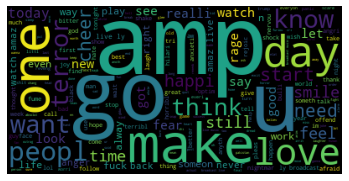

In [5]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordcloud = WordCloud().generate(" ".join(corpus))

plt.figure()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

# Two different approaches

We have implemented two different ways in which the rest of the preprocessing can be achieved: __BoW__ and __TF-IDF__.
In order to test both approaches run the code of one of the chapters and jump to the __Algorithm__ section.
You can come back latter and try the other.

## Bag of Words

The BoW algorithm starts by creating a matrix with a slot for every word in the dataset. It then counts, for each document, how many of those words it has. This allows it to compare how close 2 documents are by how similar their matrix representations are.

In [104]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus).toarray()
testsetX = vectorizer.transform(test_corpus).toarray()

X_train = X
X_test = testsetX
y_train = dataset['Emotion']
y_test = testset['Emotion']
print(X.shape)

(2827, 5434)


## TF-IDF

This algorithm calculates 2 terms:

 - TF - that is the frequency in which a word appears in a document (a tweet in our case)
 - IDF - logarithm of the inverse of the frequency in which the word appears in the whole corpus (the collection of all documents)
 
 By multiplying these two terms you get the TF-IDF, that gets you a value of the frequency of each word in different sentences, but corrects for their overall frequency so that common words (such as "that", "and", "my", etc.) are not overrepresented.

In [105]:

from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer

tfIdfTransformer = TfidfTransformer(use_idf=True)
countVectorizer = CountVectorizer()
# for the dataset
wordCount = countVectorizer.fit_transform(corpus)
X = tfIdfTransformer.fit_transform(wordCount)
# for testset
wordCount = countVectorizer.transform(test_corpus)
testsetX = tfIdfTransformer.transform(wordCount)

X_train = X
X_test = testsetX
y_train = dataset['Emotion']
y_test = testset['Emotion']
print(X.shape)

(2827, 5434)


# Algorithms

Now that we have a workable dataset we can experiment with some different algorithms to help us classify what type of emotion is associated with our test data.
We can then test the model's predictions against the test data and compare results.

## Naïve Bayes

As its name suggests, this algorithm takes advantage of the Bayes's Theorem in probability theory.

We use a specific instance of the algorithm, the Multinomial Naive Bayes, where the P follows a multinomial distribution.

In [69]:
# Import Nayve Bayes model
from sklearn.naive_bayes import MultinomialNB

# Create Nayve Bayes Model
clf = MultinomialNB()

# Train the model using the training sets
clf.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))

# accuracy, precision, recall, f1
print("Precision : " ,precision_score(y_test, y_pred, average=None))
print("Recall Score : ", recall_score(y_test,y_pred, average=None))
print("Accuracy Score : ", accuracy_score(y_test,y_pred))
print("F1 Score : ", f1_score(y_test,y_pred, average=None))

[[148  19   4]
 [  4 174   6]
 [  2   6 331]]
Precision :  [0.96103896 0.87437186 0.97067449]
Recall Score :  [0.86549708 0.94565217 0.97640118]
Accuracy Score :  0.9409221902017291
F1 Score :  [0.91076923 0.90861619 0.97352941]


## Support Vector Machine (SVM)

In this algorithm, each data item is represented as a point in a n-dimensional space, where the coordinates are the value of the features.

The model returns the result for a given input by creating a Hyperplane in space, that differentiates the various types of labels.

The goal of SVM is maximizing the distance between the nearest data points and the hyper-plane (Margin).

In [60]:
# Import svm model
from sklearn import svm

# Create a svm Classifier
clf = svm.SVC(kernel='linear', probability=True, C=10) # Linear Kernel

# Train the model using the training sets
clf.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))


print("Precision : " ,precision_score(y_test, y_pred, average=None))
print("Recall Score : ", recall_score(y_test,y_pred, average=None))
print("Accuracy Score : ", accuracy_score(y_test,y_pred))
print("F1 Score : ", f1_score(y_test,y_pred, average=None))

[[163   3   5]
 [ 13 167   4]
 [  0   0 339]]
Precision :  [0.92613636 0.98235294 0.97413793]
Recall Score :  [0.95321637 0.9076087  1.        ]
Accuracy Score :  0.9639769452449568
F1 Score :  [0.93948127 0.94350282 0.98689956]


## Random Forest

This classifier combines, through majority voting, the results of different decision trees classifiers, on various sub samples and features of the dataset.

In [102]:
# Import Random Forest model
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, criterion='entropy', n_jobs=-1)

# Train the model using the training sets
clf.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))

print("Precision : " ,precision_score(y_test, y_pred, average=None))
print("Recall Score : ", recall_score(y_test,y_pred, average=None))
print("Accuracy Score : ", accuracy_score(y_test,y_pred))
print("F1 Score : ", f1_score(y_test,y_pred, average=None))

[[157  10   4]
 [  5 176   3]
 [  0   0 339]]
Precision :  [0.9691358  0.94623656 0.97976879]
Recall Score :  [0.91812865 0.95652174 1.        ]
Accuracy Score :  0.968299711815562
F1 Score :  [0.94294294 0.95135135 0.98978102]


## KNN

This classification algorithm uses proximity to make predictions about the grouping of data points.

It finds the K nearest neighbours of a data point and assigns it the most common value in its neighbourhood.

In [100]:
# Import KNN model
from sklearn.neighbors import KNeighborsClassifier

# Create a KNN Classifier
clf = KNeighborsClassifier(n_neighbors=40,weights='distance')

# Train the model using the training sets
clf.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))

print("Precision : " ,precision_score(y_test, y_pred, average=None))
print("Recall Score : ", recall_score(y_test,y_pred, average=None))
print("Accuracy Score : ", accuracy_score(y_test,y_pred))
print("F1 Score : ", f1_score(y_test,y_pred, average=None))

[[147  11  13]
 [ 17 153  14]
 [  0   0 339]]
Precision :  [0.89634146 0.93292683 0.92622951]
Recall Score :  [0.85964912 0.83152174 1.        ]
Accuracy Score :  0.920749279538905
F1 Score :  [0.87761194 0.87931034 0.96170213]


# Input Testing

If you want to play a bit with the models, the following code lets you input a new sentence that the model will try to predict the associated emotion.

In [ ]:
import os

rev = input("Enter tweet: ")

# vectorize the review
V = vectorizer.transform([rev]).toarray()

print(rev)
print(V.shape)
print(V)

print("Review : ", clf.predict(V))
